# Buildmodel

Build nonlinear time series models from scalar time series data using minimum description length radila basis function formalism

## Sample data

First we generate some typical test data to play with

In [1]:
include("ChaosFunctions.jl")

addnoise (generic function with 1 method)

In [2]:
using Plots

In [3]:
z=lorenzpoints(5000,0.05)

3×5001 Array{Float64,2}:
 -9.3954   -9.11588  -8.65294  -8.14648  …   0.348011  -0.90338  -1.72562
 -9.09342  -8.3313   -7.63451  -7.18491     -2.88828   -2.83896  -3.19333
 28.5537   28.7701   28.4925   27.8354      24.9674    21.8964   19.3518

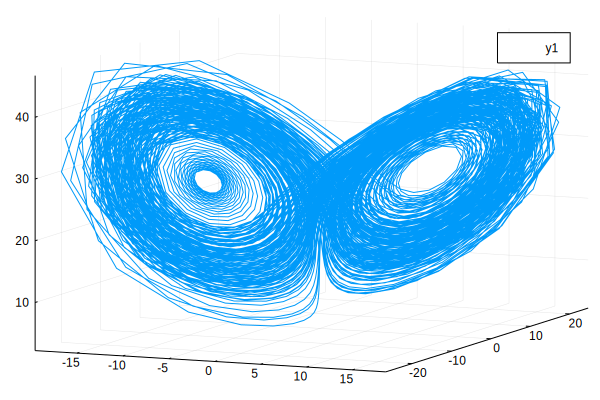

In [4]:
plot(z[1,:],z[2,:],z[3,:])

In [5]:
z=rosslerpoints(5000,0.2)

3×5001 Array{Float64,2}:
 -2.09051    -1.75877    -1.34197   …  -0.459284  -1.49662   -2.20517
 -1.45337    -1.90718    -2.303         3.23109    3.15526    2.90361
  0.0252208   0.0261013   0.027361      3.509      0.936751   0.227118

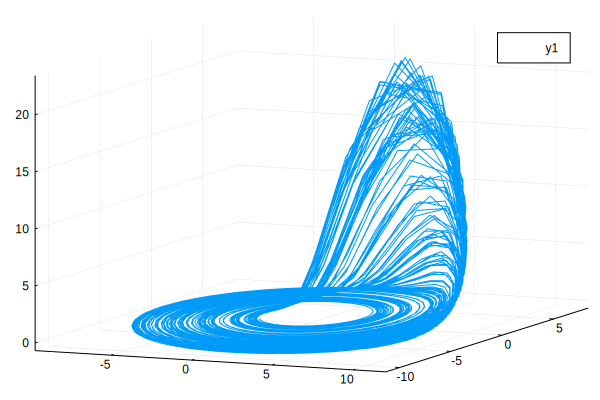

In [6]:
plot(z[1,:],z[2,:],z[3,:])

In [7]:
z=itmap(tinkerbell,-[0.7, 0.6],10000)

2×10000 Array{Float64,2}:
 -0.106024  -0.00524985   0.0848639  …  -0.0789416  -0.43416   -0.148745
 -0.407701  -0.329446    -0.171764      -0.978687   -0.492709  -0.686846

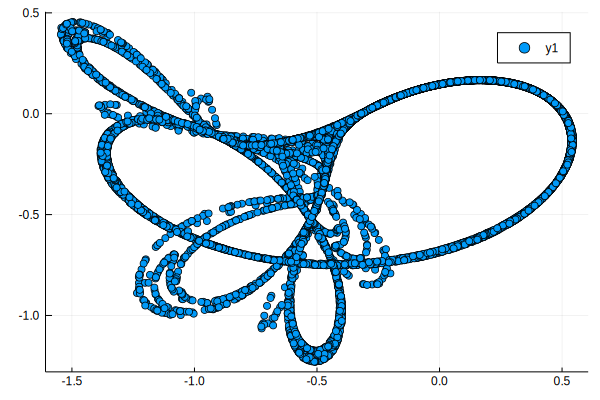

In [8]:
plot(z[2,:],z[1,:],linetype=:dots)

In [9]:
zn=addnoise(z,0.05)

2×10000 Array{Float64,2}:
 -0.1003    -0.0341481   0.0497125  …  -0.0870109  -0.433484  -0.147642
 -0.360484  -0.313045   -0.228958      -0.977349   -0.463389  -0.69207

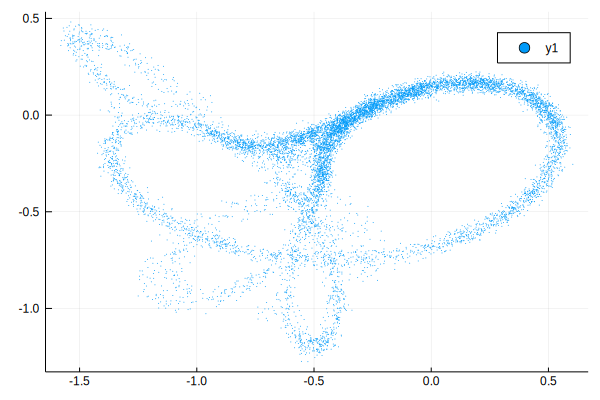

In [10]:
plot(zn[2,:],zn[1,:],linetype=:dots,markersize=0.1)

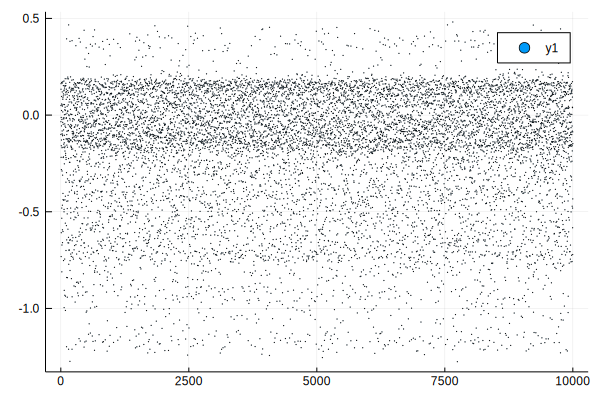

In [11]:
plot(zn[1,:],linetype=:dots,markersize=0.5)

In [12]:
z=itmap(logistic,1/π,10^4);

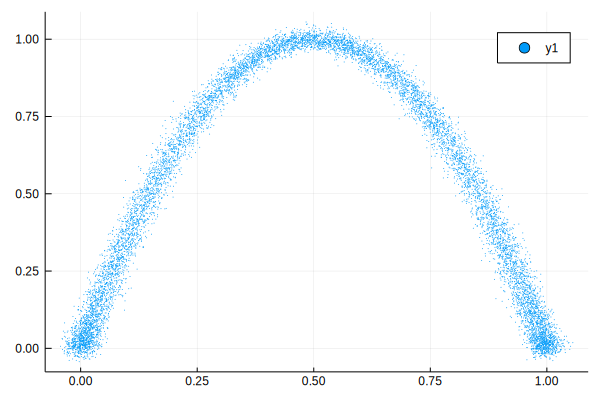

In [13]:
z=itmap(logistic,1/π,10^4);
zn=addnoise(z,0.05)
plot(zn[1:end-1],zn[2:end],linetype=:dots,markersize=0.1)

## Build the model

Import the modelling code, and away we go.

In [16]:
include("BasisFunctionTypes.jl")
include("Place.jl")

Main.Place

Any valid inline function can be used as a penlaty function (it must operate on globally defined functions in `Place.topdown` and must return a scalar, the algorithm seeks a minimum of this function. Four useful examples follow (description length ala `Rissanen` requires extra computation in the main code to account for parameter precisions.

In [15]:
#need to make these variables in scope of the current WS
nx=Int64(length(z))
mss=Float64(Inf)
λ=Array{Float64,1}[]
δ=Array{Float64,1}[]
#valid penalty criteria
Schwarz = :(nx*log(mss)+nk*log(nx))
Akaike = :(nx*log(mss)+2*nk)
Rissanen = :(description(mss,λ,δ,nx)) #Rissanen desciption length
Model30 = :(-nk*(nk<=30))
#nx is # of observation (length of data)
#nk is # of parameters (basis functions in model)
#mss is the mean-sum-square model prediction error
#λ are the model parameters and δ their precisions

:(-nk * (nk <= 30))

Next, the dictionary `options` defined model structure and optional modelling parameters (it'll run a produce something even if `options` is empty, but it might be better to populate this somewhat intelligently. A useful example to model the (admittedly rather simple) logistic map is provided

In [68]:
options=Dict("stopstep"=>10,
    "testdatum"=> 8000,
    "functions"=> (gaussian,tophat),
    "embedding" => Place.vembed([0,1,2,3]),
 #   "embedding" => ([0, 1], [0, 1, 2, 3]),
    "penalty"=> Rissanen,
    "nneighbours"=> 1
    )

Dict{String,Any} with 6 entries:
  "penalty"     => :(description(mss, λ, δ, nx))
  "stopstep"    => 10
  "embedding"   => ([0], [1], [0, 1], [2], [0, 2], [1, 2], [0, 1, 2], [3], [0, …
  "testdatum"   => 8000
  "functions"   => (gaussian, tophat)
  "nneighbours" => 1

And, then, away we go...

In [69]:
mymodel, X, zout, mdlv = Place.buildmodel(zn,options)

dx=4, nx=7999
needδ=true
*MSS=0.12367070860692765 DL=2999.6752824199966 size=1
MSS=0.23470203484298344 DL=5557.050965600935 size=1
WARNING Qδ=1/δ has no exact solution in 2-D case - giving up
*MSS=0.08966449355844935 DL=1713.554386182986 size=2
WARNING Qδ=1/δ has no exact solution in 2-D case - giving up
*MSS=0.08522010562268072 DL=1509.2309080472603 size=2
*MSS=0.06490055758755289 DL=427.6642903535847 size=3
*MSS=0.05594121887440491 DL=-160.17780030400183 size=4
*MSS=0.035085478351100596 DL=-2025.1713619387763 size=4
*MSS=0.03056128247593125 DL=-2575.4701674227463 size=4
*MSS=0.027885405242279487 DL=-2936.5616124476073 size=5
*MSS=0.025721122430878183 DL=-3253.4877605311335 size=6
MSS=0.02631544107394764 DL=-3160.722604311792 size=6
*MSS=0.021472296247544802 DL=-3966.4177202370624 size=7
*MSS=0.01846967588714584 DL=-4568.95264841222 size=7
*MSS=0.015637213381002157 DL=-5234.386906011022 size=7
*MSS=0.013895407409251418 DL=-5699.578451431036 size=8
MSS=0.0145439245226528 DL=-5516.44820

(Main.Place.PlaceModel(Main.Place.BasisFunc[Main.Place.BasisFunc(tophat, [0, 1], 0.7542570616697014, [0.16408809972059768 0.5011328840155026 … 0.4900954785067743 0.4768728032589897; 0.9389168006314078 0.15389686522102441 … 0.12381480103700164 0.8465324070301686], [3.6278359473496127]), Main.Place.BasisFunc(tophat, [0, 2], 0.26545168566184124, [0.16408809972059768 0.5011328840155026 … 0.4900954785067743 0.4768728032589897; 0.3633111907922208 0.9670921732081059 … 0.9407185993094613 0.3189188778118321], [3.353174915761035]), Main.Place.BasisFunc(tophat, [1], 0.3823433505361851, [0.9389168006314078 0.15389686522102441 … 0.12381480103700164 0.8465324070301686], [3.3339013849256016]), Main.Place.BasisFunc(tophat, [1], 0.16841932669408516, [0.9389168006314078 0.15389686522102441 … 0.12381480103700164 0.8465324070301686], [4.479062466863747]), Main.Place.BasisFunc(tophat, [0, 1], 0.12990460092910894, [0.16408809972059768 0.5011328840155026 … 0.4900954785067743 0.4768728032589897; 0.93891680063

Modelling done, we can make one-step predictions on time series data

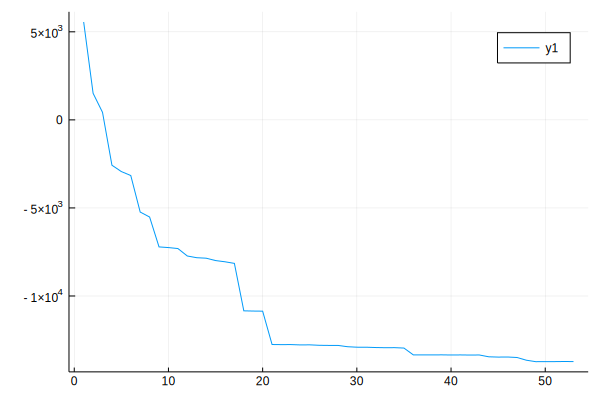

In [70]:
plot(mdlv)

In [71]:
yt,yp,ep = Place.predict(mymodel, z);

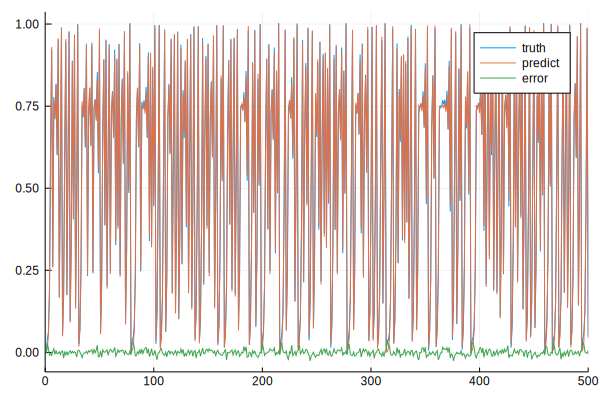

In [72]:
plot(yt,label="truth")
plot!(yp,label="predict")
plot!(ep,label="error",xlimit=(0,500))

Or, free run simulations

In [73]:
yp, yt = Place.freerun(mymodel,zn,500)

([0.00233387032685628, 0.04435342777941331, 0.14097261527469573, 0.48952758081676623, 0.9956023966656137, 0.013209303896603575, 0.057337848760195875, 0.2024682184995945, 0.649682252198611, 0.906578185912973  …  0.22693295967269966, 0.6986294117044183, 0.8509336223328372, 0.5171388031230522, 0.9899648306489062, 0.008302547360237389, 0.05363661395741337, 0.18031250959594325, 0.5930847312264266, 0.9564215695391877], [0.013560125616286629, 0.03266014966570542, 0.02020831682814095, 0.20821380217112112, 0.6267967664429014, 0.9569626803839222, 0.2754237678608336, 0.764736171576987, 0.7024254488499094, 0.828381716786073  …  0.13949215544799512, 0.4835350467980142, 1.0556837782677184, 0.01833215857083246, 0.014295116189602853, 0.031468953361951296, 0.16662276398351075, 0.456449798110953, 0.9758815661358046, 0.03157271394513345])

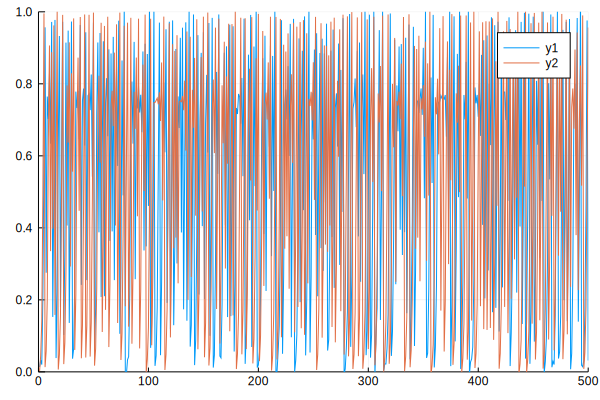

In [74]:
plot(yt)
plot!(yp,ylimit=(0,1),xlimit=(0,500))


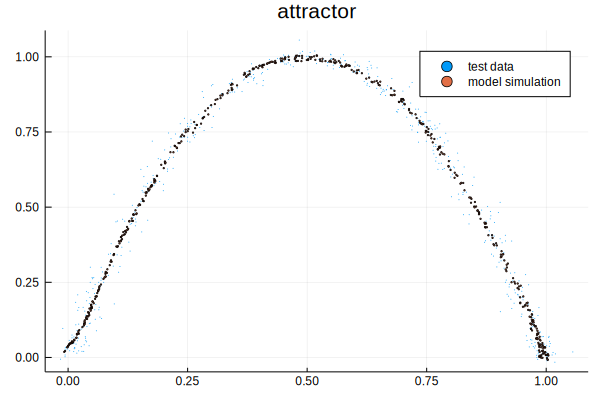

In [77]:
plot(yt[1:end-1],yt[2:end],linetype=:dots,markersize=0.1,label="test data")
plot!(yp[1:end-1],yp[2:end],linetype=:dots,markersize=1,label="model simulation",title="attractor")

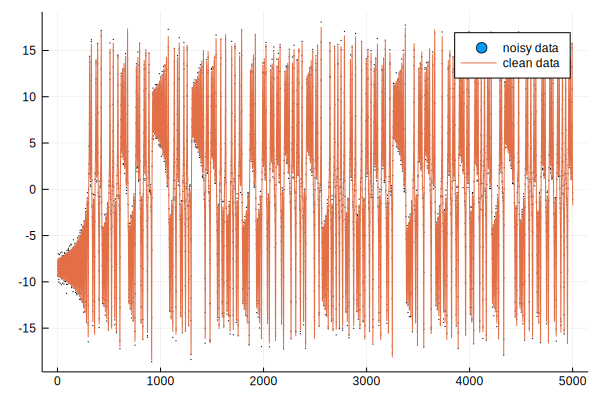

In [88]:
z=lorenzpoints(5000,0.05)
y=z[1,:]
yn=addnoise(y,0.05)
plot(yn,linetype=:dots,markersize=0.5,label="noisy data")
plot!(y,label="clean data")

In [98]:
options=Dict("stopstep"=>10,
    "testdatum"=> 8000,
    "functions"=> (gaussian,tophat),
    "embedding" => Place.vembed([0,1,2,3,6,12]),
 #   "embedding" => ([0, 1], [0, 1, 2, 3]),
    "penalty"=> Rissanen,
    "nneighbours"=> 1
    )

Dict{String,Any} with 6 entries:
  "penalty"     => :(description(mss, λ, δ, nx))
  "stopstep"    => 10
  "embedding"   => ([0], [1], [0, 1], [2], [0, 2], [1, 2], [0, 1, 2], [3], [0, …
  "testdatum"   => 8000
  "functions"   => (gaussian, tophat)
  "nneighbours" => 1

In [99]:
mymodel, X, zout, mdlv = Place.buildmodel(yn,options)

dx=13, nx=4488
needδ=true
*MSS=4.616691523181066 DL=9813.124359538824 size=1
WARNING Qδ=1/δ has no exact solution in 2-D case - giving up
*MSS=3.0638355600725156 DL=8904.851601319548 size=2
*MSS=2.7400841158305766 DL=8644.797022167539 size=3
*MSS=2.687740032538275 DL=8606.814374951271 size=4
*MSS=1.6421605046928764 DL=7502.91322032486 size=4
MSS=1.640182399664261 DL=7506.687126516439 size=5
*MSS=1.5623944095287616 DL=7394.1499393749145 size=5
MSS=1.5585204524853016 DL=7394.976436630174 size=6
*MSS=1.4048266448672213 DL=7160.11135920807 size=6
MSS=1.4016922399915375 DL=7161.669306933557 size=7
*MSS=1.190200661678023 DL=6795.028420913211 size=7
MSS=1.1887298758332603 DL=6798.94663040534 size=8
*MSS=1.0264145079431233 DL=6467.86170937584 size=8
MSS=1.0243205158801192 DL=6469.3290554291725 size=9
*MSS=0.9403306152556494 DL=6275.4549842015795 size=9
*MSS=0.9320816976419656 DL=6261.508297554551 size=10
MSS=0.9362346051278252 DL=6271.904911479726 size=10
*MSS=0.9224422136230236 DL=6244.073215

(Main.Place.PlaceModel(Main.Place.BasisFunc[Main.Place.BasisFunc(gaussian, [1], 4.300481092144282, [11.307494167963371 -5.170579546816584 … -14.7565136207741 -15.335215465652814], Any[]), Main.Place.BasisFunc(tophat, [3], 2.798190118710098, [7.123338366177978 -3.1837826393293347 … -10.349043140327423 -9.536107547506068], [3.4637786284096403]), Main.Place.BasisFunc(tophat, [2, 3], 7.620266599993665, [8.74229955967443 -3.959387818513777 … -13.535967098140723 -13.148560811710748; 7.123338366177978 -3.1837826393293347 … -10.349043140327423 -9.536107547506068], [2.7116904543132563]), Main.Place.BasisFunc(tophat, [0, 1, 2], 10.371150085213863, [13.276753904642906 -6.509868720251821 … -13.018455137484375 -14.233863025822114; 11.307494167963371 -5.170579546816584 … -14.7565136207741 -15.335215465652814; 8.74229955967443 -3.959387818513777 … -13.535967098140723 -13.148560811710748], [2.7698654253620316]), Main.Place.BasisFunc(tophat, [1, 2, 6], 15.562532668650542, [11.307494167963371 -5.1705795

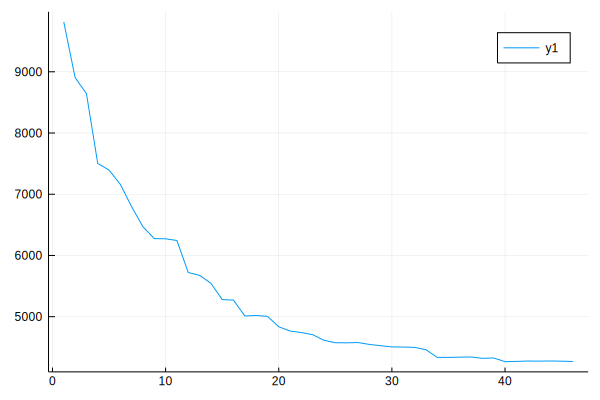

In [100]:
plot(mdlv)

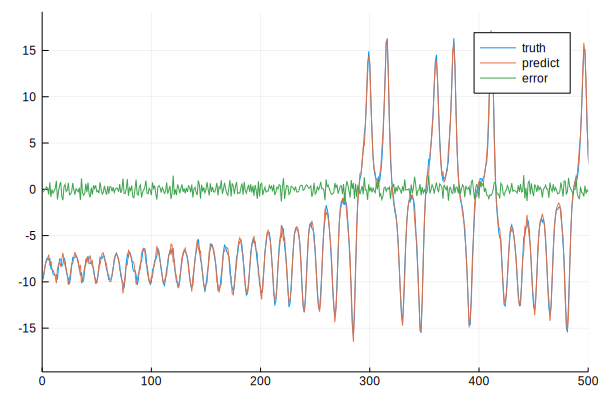

In [101]:
yt,yp,ep = Place.predict(mymodel, yn);
plot(yt,label="truth")
plot!(yp,label="predict")
plot!(ep,label="error",xlimit=(0,500))

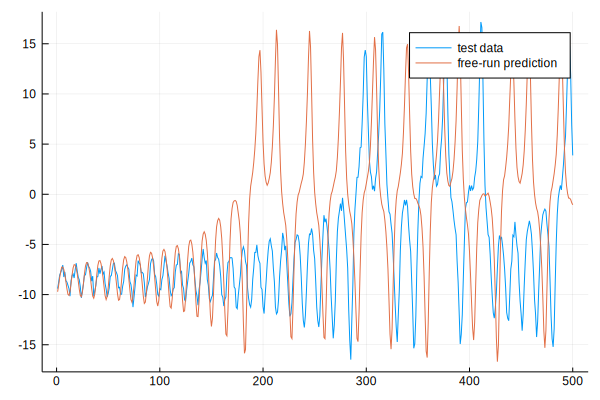

In [108]:
yp, yt = Place.freerun(mymodel,yn,500)
plot(yt,label="test data")
plot!(yp,label="free-run prediction")

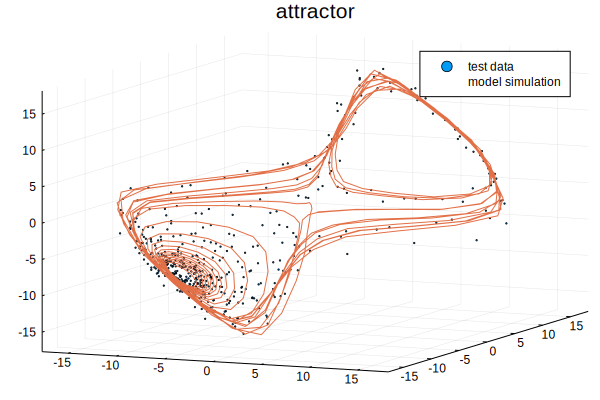

In [110]:
plot(yt[1:end-6],yt[4:end-3],yt[7:end],linetype=:dots,markersize=1,label="test data")
plot!(yp[1:end-6],yp[4:end-3],yp[7:end],label="model simulation",title="attractor")

## Michael Small

Last updated 12/7